In [3]:
import numpy as np
from tqdm import tqdm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.sparse import csgraph
import scipy.stats.stats as st
from tqdm import tqdm
import math
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Experiment 1

In [6]:
def DotsCoordinates(n, k, a):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    
    Возвращает матрицу, в которой построчно записаны координаты точек
    '''
    
    result = np.zeros((k,n))
    for i in range(k):
        result[i] = np.random.uniform(0,a,n)
        
    return result

In [7]:
def EuclidMatrix(coord_matrix):
    
    '''
    coord_matrix - матрица с координатами точек (ее возвращает DotsCoordinates)
    
    Возвращает матрицу, в ячейке [i,j] которой записано евклидово расстояние между i-й и j-й точками матрицы coord_matrix
    '''
    
    result = np.zeros((len(coord_matrix), len(coord_matrix)))
    for i in range(len(result)):
        for j in range(len(result)):
            result[i,j] = distance.euclidean(coord_matrix[i], coord_matrix[j])
            
    return result

In [8]:
def CreateAdjMatrix(euclid_matrix, eps):
    
    '''
    euclid_matrix - матрица евклидовых расстояний между всеми точками пространства
    eps - значение параметра epsilon
    
    Возвращает матрицу смежности графа, в котором i-й и j-й узлы соединены ребрами 
    если евклидовое расстояние между ними меньше epsilon
    '''
    
    result = np.zeros((len(euclid_matrix), len(euclid_matrix)))
    connected_dots = list(zip(*np.where(euclid_matrix <= eps)))
    for j in range(len(connected_dots)):
        result[connected_dots[j][0]][connected_dots[j][1]] = 1
        
    return result
    

In [28]:
def Compute(n, k, a, eps_min, eps_max, steps, show_graph=False, pdf_export=False):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    eps_min - минимальное значение eps
    eps_max - максимальное значение eps
    steps - количество итераций от eps_min до eps_max
    show_graph - True, если необходимо построить график зависимости количества кластеров от значения epsilon, False иначе
    pdf_export - True, если необходимо экспортировать график в PDF
    
    Возвращает значение epsilon, при котором образуется кластер
    '''
    
    matrix = DotsCoordinates(n, k, a)
    euclid_matrix = EuclidMatrix(matrix)
    components_num = np.array([])
    flag = False
    epsilons = np.arange(eps_min, eps_max, (eps_max - eps_min)/steps)
    for i in range(steps):
        adj_matrix = CreateAdjMatrix(euclid_matrix, epsilons[i])
        components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
        components_num = np.append(components_num, components)
        if (components == 1 and flag == False):
            one_component_x = epsilons[i]
            one_component_y = components
            flag = True
            if flag:
                new_eps = one_component_x
            
    
    if not flag:
        new_eps = None
    
    if show_graph:
        fig = plt.figure(figsize=(15,8))
        plt.plot(epsilons, components_num)
        plt.title('Зависимость количества кластеров от значения $\epsilon$', size=15)
        plt.ylabel('Количество кластеров', size=13)
        plt.xlabel('Значение $\epsilon$', size=13)
        plt.scatter(one_component_x, one_component_y, c='red', marker='o')
        plt.legend()
        plt.grid()
        plt.show()

    if pdf_export:
        pp = PdfPages('Graph.pdf')
        pp.savefig(fig)
        pp.close()
    
    return new_eps

In [130]:
epsilons = np.array([])

for i in tqdm(range(500)):
    epsilons = np.append(epsilons, (Compute(100, 100, 1, 3.6, 4, 1000, False, False)))

100%|████████████████████████████████████████| 500/500 [21:46<00:00,  2.61s/it]


In [131]:
epsilons_none = epsilons[epsilons != None]
mean = np.mean(epsilons_none)
std = np.std(epsilons_none)
var = np.var(epsilons_none)
print('Mean =', mean)
print('Standart deviation =', std)
print('Variance =', var)

Mean = 3.800525851703386
Standart deviation = 0.0504842747499
Variance = 0.002548661997019528


In [41]:
epsilons2 = np.array([])

for i in tqdm(range(500)):
    epsilons2 = np.append(epsilons2, (Compute(200, 100, 1, 5.4, 5.6, 1000, False, False)))

100%|████████████████████████████████████████| 500/500 [18:46<00:00,  2.25s/it]


In [42]:
epsilons_none2 = epsilons2[epsilons2 != None]
mean2 = np.mean(epsilons_none2)
std2 = np.std(epsilons_none2)
var2 = np.var(epsilons_none2)
print('Mean =', mean2)
print('Standart deviation =', std2)
print('Variance =', var2)

Mean = 5.497198315789678
Standart deviation = 0.0426581712702
Variance = 0.0018197195761184843


In [56]:
epsilons3 = np.array([])

for i in tqdm(range(500)):
    epsilons3 = np.append(epsilons3, (Compute(200, 100, 3, 16, 17, 1000, False, False)))

100%|████████████████████████████████████████| 500/500 [18:42<00:00,  2.24s/it]


In [57]:
epsilons_none3 = epsilons3[epsilons3 != None]
mean3 = np.mean(epsilons_none3)
std3 = np.std(epsilons_none3)
var3 = np.var(epsilons_none3)
print('Mean =', mean3)
print('Standart deviation =', std3)
print('Variance =', var3)

Mean = 16.50936
Standart deviation = 0.146770304899
Variance = 0.0215415224001


In [132]:
print('Отношение среднего значения eps к длине диагонали')
print('Первый эксперимент:', mean / (1 * math.sqrt(100)))
print('Второй эксперимент:', mean2 / (1 * math.sqrt(200)))
print('Третий эксперимент:', mean3 / (3 * math.sqrt(200)))

Отношение среднего значения eps к длине диагонали
Первый эксперимент: 0.3800525851703386
Второй эксперимент: 0.3887106206622149
Третий эксперимент: 0.389129346968


# Experiment 2

In [116]:
def Compute2(n, k, a, eps_min, eps_max, steps, show_graph=False, pdf_export=False):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    eps_min - минимальное значение eps
    eps_max - максимальное значение eps
    steps - количество итераций от eps_min до eps_max
    show_graph - True, если необходимо построить график зависимости количества кластеров от значения epsilon, False иначе
    pdf_export - True, если необходимо экспортировать график в PDF
    
    Возвращает 
    
    start_eps - значение epsilon, при котором граф имеет k-1 компоненту связности 
    fin_eps - значение epsilon, при котором образуется кластер
    '''
    
    matrix = DotsCoordinates(n, k, a)
    euclid_matrix = EuclidMatrix(matrix)
    components_num = np.array([])
    flag1 = False
    flag2 = False
    epsilons = np.arange(eps_min, eps_max, (eps_max - eps_min)/steps)
    for i in range(steps):
        adj_matrix = CreateAdjMatrix(euclid_matrix, epsilons[i])
        components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
        components_num = np.append(components_num, components)
        if (components < k and flag1 == False):
            start_eps = epsilons[i]
            start_components = components
            flag1 = True
            
        if (components == 1 and flag2 == False):
            one_component_x = epsilons[i]
            one_component_y = components
            flag2 = True
            fin_eps = one_component_x
            
    
    if not flag1:
        start_eps = None
    if not flag2:
        fin_eps = None
    
    if show_graph:
        fig = plt.figure(figsize=(15,8))
        plt.plot(epsilons, components_num)
        plt.title('Зависимость количества кластеров от значения $\epsilon$', size=15)
        plt.ylabel('Количество кластеров', size=13)
        plt.xlabel('Значение $\epsilon$', size=13)
        plt.scatter(start_eps, start_components, c='red', marker='o')
        plt.scatter(fin_eps, one_component_y, c='red', marker='o')
        plt.axvline(x=start_eps, color='tomato', linestyle='--')
        plt.axvline(x=fin_eps, color='tomato', linestyle='--')
        plt.legend()
        plt.grid()
        plt.show()

    if pdf_export:
        pp = PdfPages('Graph.pdf')
        pp.savefig(fig)
        pp.close()
    
    return start_eps, fin_eps

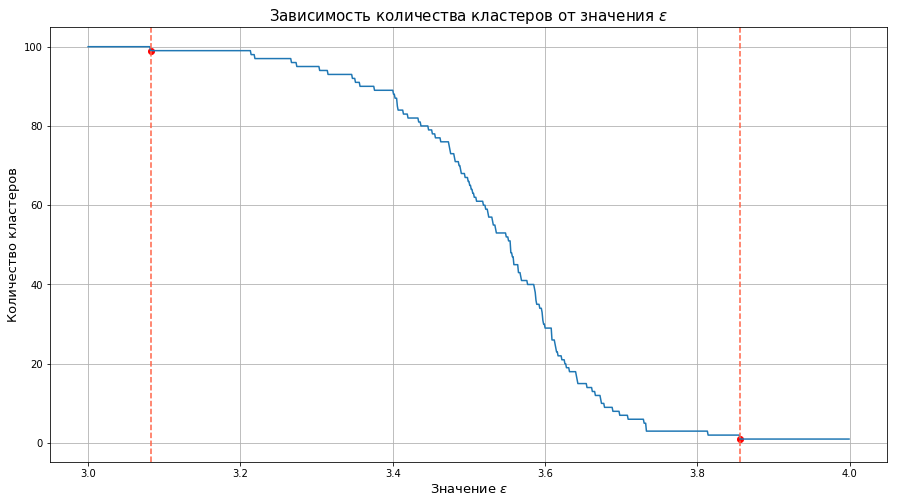

(3.081999999999991, 3.8559999999999057)

In [133]:
Compute2(100, 100, 1, 3, 4, 1000, True, False)

In [121]:
diff_epsilons = np.array([])

for i in tqdm(range(500)):
    tuples = Compute2(100, 100, 1, 3, 4, 1000, False, False)
    diff_epsilons = np.append(diff_epsilons, tuples[1] - tuples[0])


  0%|                                                  | 0/500 [00:00<?, ?it/s]
Exception in thread Thread-9:
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python36\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "c:\users\asus\appdata\local\programs\python\python36\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|████████████████████████████████████████| 500/500 [14:45<00:00,  1.77s/it]


In [124]:
diff_epsilons_none = diff_epsilons[diff_epsilons != None]
mean4 = np.mean(diff_epsilons_none)
std4 = np.std(diff_epsilons_none)
var4 = np.var(diff_epsilons_none)
print('Mean =', mean4)
print('Standart deviation =', std4)
print('Variance =', var4)

Mean = 0.619036
Standart deviation = 0.0864930442521
Variance = 0.007481046704


# Experiment 3

In [186]:
def Compute3(n, k, a, eps):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    eps - значение параметра epsilon
    
    Возвращает True, если при заданных параметрах образуется смежный граф и False иначе
    '''
    
    matrix = DotsCoordinates(n, k, a)
    euclid_matrix = EuclidMatrix(matrix)
    adj_matrix = CreateAdjMatrix(euclid_matrix, eps)
    components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
    if components == 1:
        return True
    
    return False

In [175]:
k_values = np.array([])
for i in tqdm(range(100)):
    for i in range(2,1000):
        if Compute3(100, i, 1, 3.7):
            k_values = np.append(k_values, i)
            break

100%|████████████████████████████████████████| 100/100 [36:29<00:00, 21.89s/it]


In [185]:
mean_val = np.array([])
std_val = np.array([])
var_val = np.array([])

for i in range(500):
    subselection = np.random.choice(k_values, size=50)
    mean_val = np.append(mean_val, np.mean(subselection))
    std_val = np.append(std_val, np.std(subselection))
    var_val = np.append(var_val, np.var(subselection))

k_mean = np.mean(mean_val)
k_std = np.mean(std_val)
k_var = np.mean(var_val)

print('Bootstrap mean:', k_mean)
print('Bootstrap std:', k_std)
print('Bootstrap var:', k_var)

Bootstrap mean: 121.45548
Bootstrap std: 52.2241438777
Bootstrap var: 2761.7063032


# Experiment 4

In [189]:
def Compute4(n, k, a, eps_min, eps_max, steps):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    eps_min - минимальное значение eps
    eps_max - максимальное значение eps
    steps - количество итераций от eps_min до eps_max
    show_graph - True, если необходимо построить график зависимости количества кластеров от значения epsilon, False иначе
    pdf_export - True, если необходимо экспортировать график в PDF
    
    Возвращает значение epsilon, при котором образуется кластер
    '''
    
    matrix = DotsCoordinates(n, k, a)
    euclid_matrix = EuclidMatrix(matrix)
    components_num = np.array([])
    flag = False
    epsilons = np.arange(eps_min, eps_max, (eps_max - eps_min)/steps)
    for i in range(steps):
        adj_matrix = CreateAdjMatrix(euclid_matrix, epsilons[i])
        components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
        components_num = np.append(components_num, components)
        if (components == 1 and flag == False):
            return adj_matrix
            
    
    if not flag:
        return None

In [199]:
matrices = []
first = np.array([]) 
second = np.array([])

for i in tqdm(range(500)):
    new_matrix = Compute4(100, 100, 1, 3.6, 4, 1000)
    eigenvalues = np.linalg.eigvals(new_matrix)
    eigenvalues = np.sort(eigenvalues)
    first = np.append(first, eigenvalues[-1])
    second = np.append(second, eigenvalues[-2])


100%|████████████████████████████████████████| 500/500 [12:11<00:00,  1.46s/it]


In [200]:
first_mean = np.mean(first)
first_std = np.std(first)
first_var = np.var(first)

second_mean = np.mean(second)
second_std = np.std(second)
second_var = np.var(second)

print('First eigenvalue mean:', first_mean)
print('First eigenvalue std:', first_std)
print('First eigenvalue var:', first_var)
print('\n')
print('Second eigenvalue mean:', second_mean)
print('Second eigenvalue std:', second_std)
print('Second eigenvalue var:', second_var)

First eigenvalue mean: 19.5747260386
First eigenvalue std: 5.11670941699
First eigenvalue var: 26.1807152579


Second eigenvalue mean: 8.40976618319
Second eigenvalue std: 0.88430791969
Second eigenvalue var: 0.782000496827


# Experiment 5

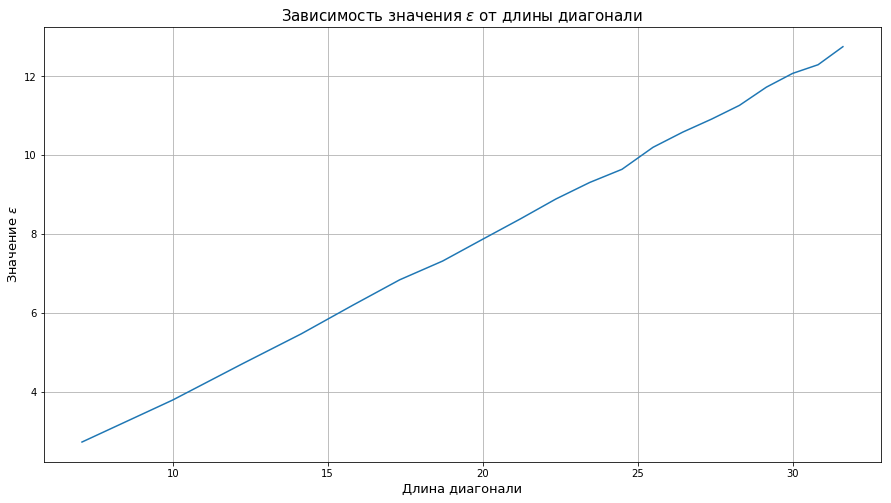

In [119]:
n_values = np.arange(50,1050,50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in n_values:
    eps_values = np.append(eps_values, Compute(n, 100, 1, 1*n/100, 20*n/100, 2000, False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от длины диагонали', size=15)
plt.xlabel('Длина диагонали', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

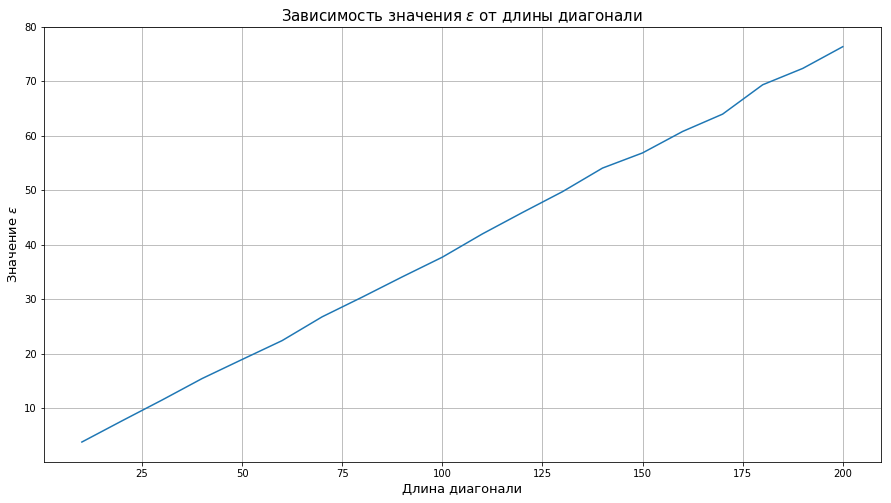

In [124]:
a_values = np.arange(1,21,1)
diag_values = a_values*np.sqrt(100)

eps_values = np.array([])

for a in a_values:
    test = Compute(100, 100, a, 1*a, 10*a, 1000, False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от длины диагонали', size=15)
plt.xlabel('Длина диагонали', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

# Experiment 6

In [23]:
def Compute6(n, k, a, eps_min, eps_max, steps):
    
    '''
    n - размерность пространства
    k - количество точек
    a - длина ребра гиперкуба
    eps_min - минимальное значение eps
    eps_max - максимальное значение eps
    steps - количество итераций от eps_min до eps_max
    
    Возвращает значение числа Бетти для заданных параметров
    '''
    
    matrix = DotsCoordinates(n, k, a)
    euclid_matrix = EuclidMatrix(matrix)
    components_num = np.array([])
    flag = False
    epsilons = np.arange(eps_min, eps_max, (eps_max - eps_min)/steps)
    for i in range(steps):
        adj_matrix = CreateAdjMatrix(euclid_matrix, epsilons[i])
        components = csgraph.connected_components(csgraph=adj_matrix, directed=False, return_labels=False)
        components_num = np.append(components_num, components)
        if (components == 1 and flag == False):
            one_component_x = epsilons[i]
            one_component_y = components
            flag = True
            if flag:
                new_eps = one_component_x
          
    if not flag:
        return None
    else:
        edges_num = (np.count_nonzero(adj_matrix == 1) - k) // 2
        Betti = edges_num - k + components_num[-1]
        return Betti

In [25]:
Bettis = np.array([])

for i in tqdm(range(500)):
    Bettis = np.append(Bettis, (Compute6(100, 100, 1, 3.6, 4, 1000)))


100%|████████████████████████████████████████| 500/500 [19:12<00:00,  2.30s/it]


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [26]:
Bettis_none = Bettis[Bettis != None]
mean6 = np.mean(Bettis_none)
std6 = np.std(Bettis_none)
var6 = np.var(Bettis_none)
print('Betti Mean =', mean6)
print('Betti Standart deviation =', std6)
print('Betti Variance =', var6)

Betti Mean = 1750.6573146292585
Betti Standart deviation = 142.50629772534953
Betti Variance = 20308.044891385958


# Experiment 7

100%|██████████████████████████████████████████| 20/20 [02:29<00:00,  7.48s/it]


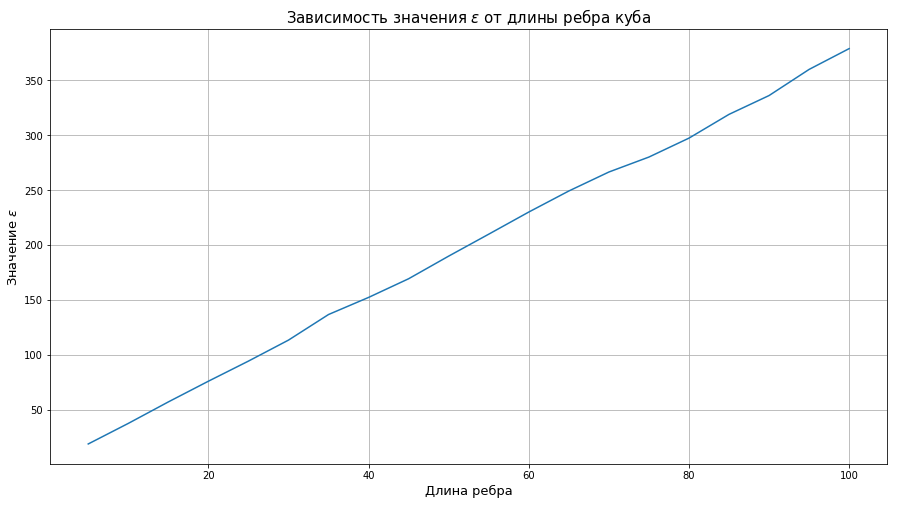

In [34]:
a_values = np.arange(5,105,5)
diag_values = a_values*np.sqrt(100)

eps_values = np.array([])

for a in tqdm(a_values):
    test = Compute(100, 100, a, 1*a, 10*a, 1000, False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(a_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от длины ребра куба', size=15)
plt.xlabel('Длина ребра', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████| 40/40 [05:46<00:00,  8.65s/it]


[ 2.52755  3.7218   4.7469   5.573    6.26975  6.867    7.38465  8.0416
  8.59905  8.858    9.41545  9.6744  10.2219  10.5903  11.04825 11.4664
 11.84475 12.0042  12.48205 12.741   13.1691  13.3584  13.73675 14.0952
 14.185   14.4937  14.7825  15.33    15.58895 15.5295  16.04715 16.2464
 16.42575 16.9235  17.073   17.2026  17.68045 17.7802  17.86005 18.318  ]


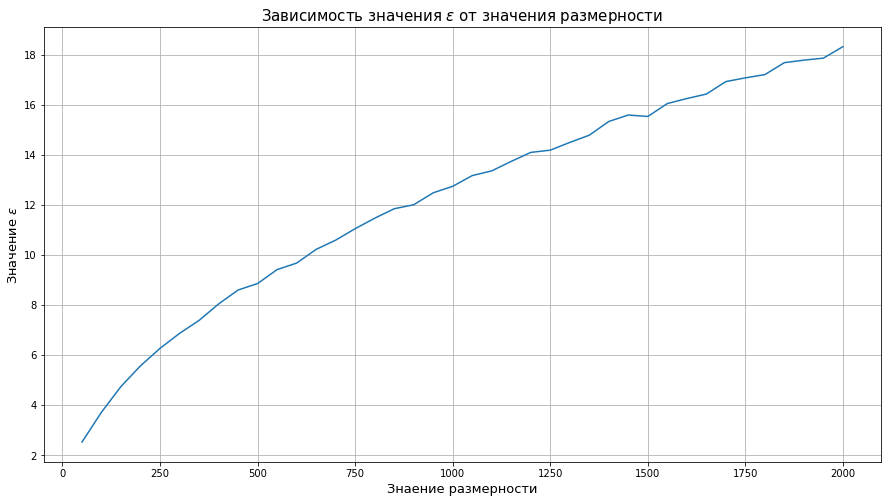

In [51]:
n_values = np.arange(50, 2050, 50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, Compute(n, 100, 1, 0.1*n/100, 20*n/100, 1000, False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(n_values, eps_values)
plt.title('Зависимость значения $\epsilon$ от значения размерности', size=15)
plt.xlabel('Знаение размерности', size=13)
plt.ylabel('Значение $\epsilon$', size=13)
plt.legend()
plt.grid()
plt.show()